In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from unidecode import unidecode 

df = pd.read_excel(r"C:\Users\Lenovo\Downloads\Project_YouTube_Trending_Video_Analytics\youtube_videos_FR.xlsx")
print(df)

                      category     video_id trending_date  \
0         Auvergne-RhAne-Alpes  Ro6eob0LrCY    11/14/2017   
1      Bourgogne-Franche-ComtA  Yo84eqYwP98    11/14/2017   
2                     Bretagne  ceqntSXE-10    11/14/2017   
3          Centre-Val_de_Loire  WuTFI5qftCE    11/14/2017   
4                        Corse  ee6OFs8TdEg    11/14/2017   
...                        ...          ...           ...   
40720                    Corse  _umkjOQJvtw     6/14/2018   
40721                Grand_Est  nt25ec7nzIM     6/14/2018   
40722          Hauts-de-France  NlxE_QQMRzg     6/14/2018   
40723           AZle-de-France  _LgKglfnqlc     6/14/2018   
40724                Normandie          NaN           NaN   

                                                   title        channel_title  \
0               Malika LePen : Femme de Gauche - Trailer  Le Raptor Dissident   
1      LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...              Le Labo   
2      DESSINS ANIMEÌS 

In [2]:
print(df.head())

                  category     video_id trending_date  \
0     Auvergne-RhAne-Alpes  Ro6eob0LrCY    11/14/2017   
1  Bourgogne-Franche-ComtA  Yo84eqYwP98    11/14/2017   
2                 Bretagne  ceqntSXE-10    11/14/2017   
3      Centre-Val_de_Loire  WuTFI5qftCE    11/14/2017   
4                    Corse  ee6OFs8TdEg    11/14/2017   

                                               title        channel_title  \
0           Malika LePen : Femme de Gauche - Trailer  Le Raptor Dissident   
1  LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...              Le Labo   
2  DESSINS ANIMEÌS FRANCÌ§AIS VS RUSSES 2 - Dani...      Daniil le Russe   
3                    PAPY GRENIER - METAL GEAR SOLID    Joueur Du Grenier   
4  QUI SAUTERA LE PLUS HAUT ? (VÃ‰LO SKATE ROLLER...    Aurelien Fontenoy   

   category_id              publish_time  trending_duration      views  \
0         24.0  2017-11-13T17:32:55.000Z            0.268808  212702.0   
1         24.0  2017-11-12T15:00:02.000Z      

In [3]:
print("Numerical Metrics Summary:")
print(df[['views', 'likes', 'dislikes', 'comment_count']].describe())

Numerical Metrics Summary:
              views         likes      dislikes  comment_count
count  4.072400e+04  4.072400e+04  4.072400e+04   4.072400e+04
mean   4.199219e+05  1.738886e+04  8.149624e+02   1.832453e+03
std    1.772130e+06  8.720509e+04  1.139219e+04   1.404321e+04
min    2.230000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%    1.697450e+04  3.380000e+02  1.800000e+01   5.600000e+01
50%    7.372100e+04  1.892500e+03  8.300000e+01   2.350000e+02
75%    2.708088e+05  7.969500e+03  3.350000e+02   8.410000e+02
max    1.009116e+08  4.750254e+06  1.353661e+06   1.040912e+06


In [4]:
print("\nCategory Distribution:")
print(df['category_id'].value_counts())


Category Distribution:
category_id
24.0    9819
22.0    5719
23.0    4343
17.0    4342
10.0    3946
25.0    3752
26.0    2361
1.0     2157
20.0    1459
28.0     802
27.0     769
2.0      673
15.0     237
19.0     119
29.0     114
43.0      99
30.0      11
44.0       2
Name: count, dtype: int64


In [5]:
df['engagement_ratio'] = (df['likes'] + df['comment_count']) / df['views']
print(df['engagement_ratio'])

0        0.155612
1        0.035159
2        0.177917
3        0.096538
4        0.060496
           ...   
40720    0.012878
40721    0.109787
40722    0.003712
40723    0.023045
40724         NaN
Name: engagement_ratio, Length: 40725, dtype: float64


Text(0.5, 1.0, 'Distribution of Views (Log Scale)')

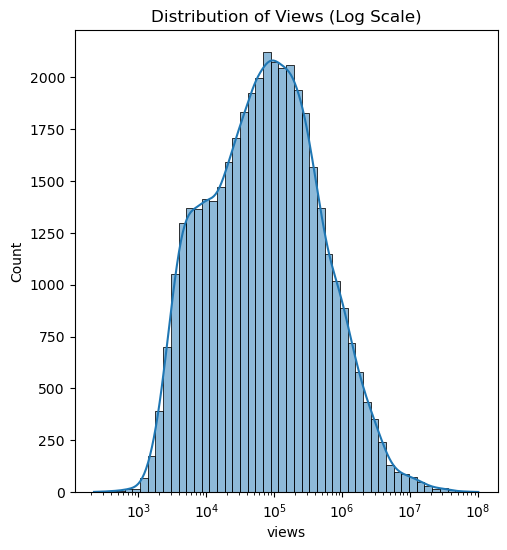

In [6]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['views'], bins=50, kde=True, log_scale=True)
plt.title('Distribution of Views (Log Scale)')

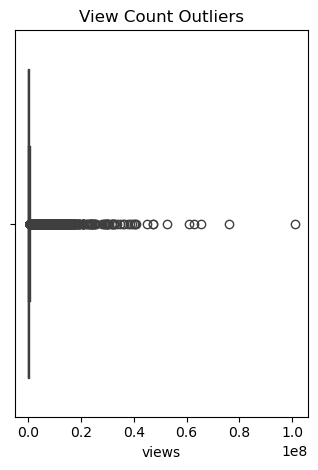

In [7]:
plt.subplot(1, 2, 2)
sns.boxplot(x=df['views'])
plt.title('View Count Outliers')
plt.tight_layout()
plt.show()

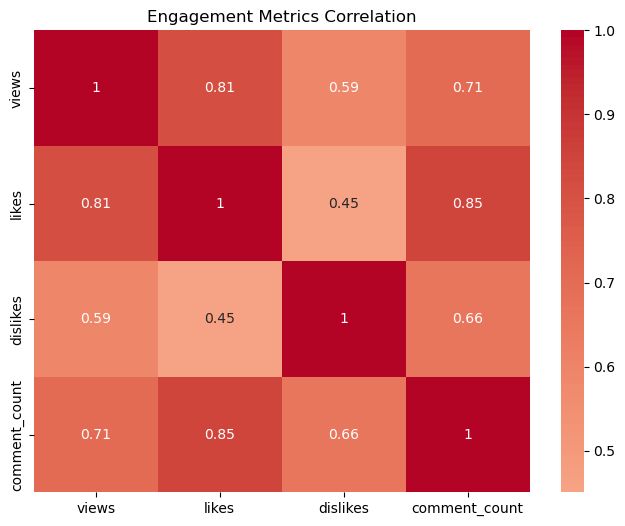

In [8]:
plt.figure(figsize=(8, 6))
corr_matrix = df[['views', 'likes', 'dislikes', 'comment_count']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Engagement Metrics Correlation')
plt.show()

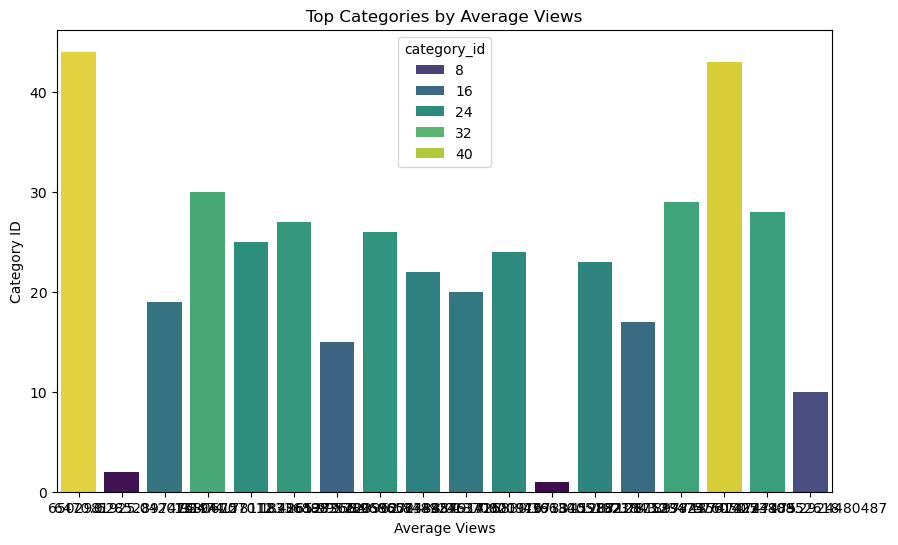

In [9]:
plt.figure(figsize=(10, 6))
top_categories = df.groupby('category_id')['views'].mean().reset_index()
top_categories = top_categories.sort_values('views', ascending=False).head(20)
sns.barplot(x='views', y='category_id', hue='category_id', data=top_categories, palette='viridis', dodge=False)
plt.title('Top Categories by Average Views')
plt.xlabel('Average Views')
plt.ylabel('Category ID')
plt.show()

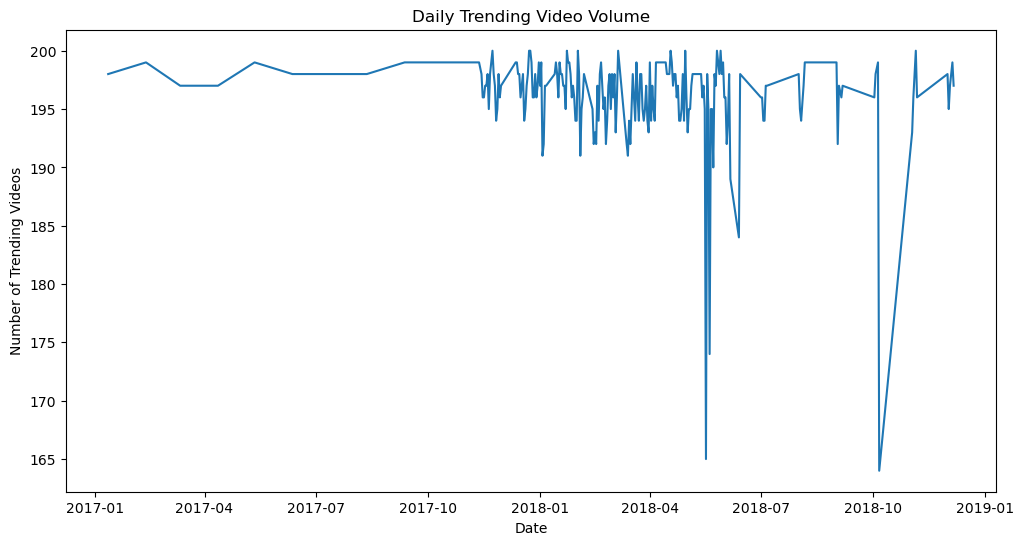

In [10]:
plt.figure(figsize=(12, 6))
df['trending_date'] = pd.to_datetime(df['trending_date'])
daily_trending = df.groupby(df['trending_date'].dt.date)['video_id'].count()
daily_trending.plot(kind='line', title='Daily Trending Video Volume')
plt.xlabel('Date')
plt.ylabel('Number of Trending Videos')
plt.show()

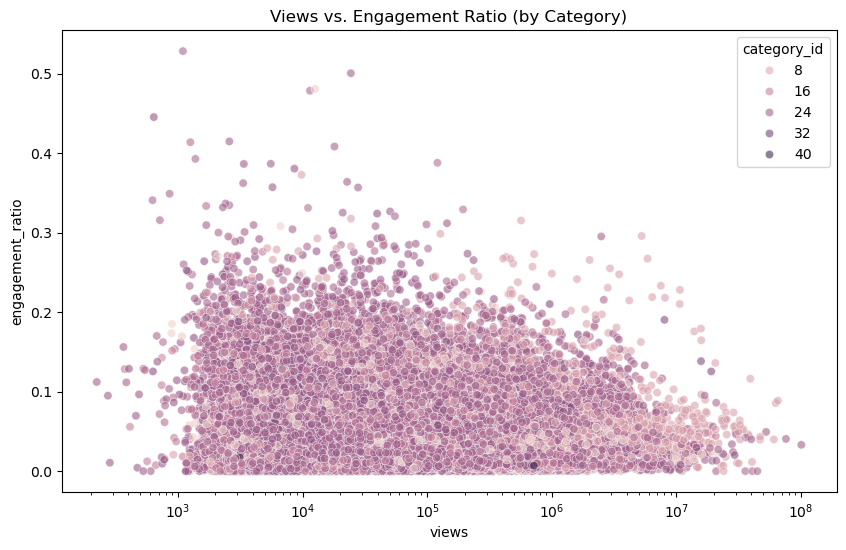

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='views', y='engagement_ratio', hue='category_id', data=df, alpha=0.6)
plt.xscale('log')  
plt.title('Views vs. Engagement Ratio (by Category)')
plt.show()

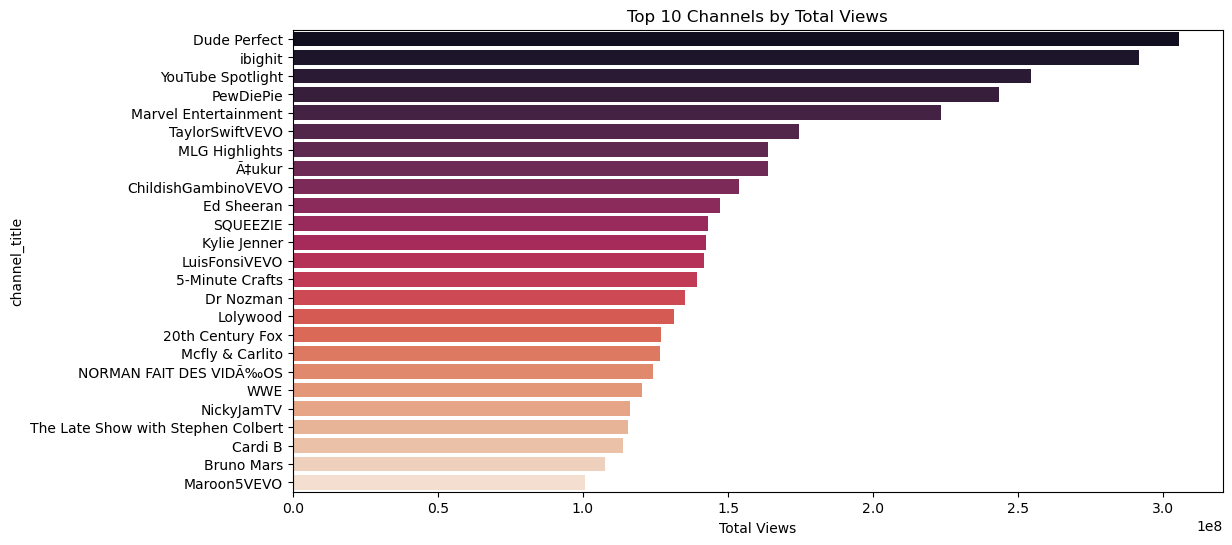

In [12]:
plt.figure(figsize=(12, 6))
top_channels = df.groupby('channel_title')['views'].sum().sort_values(ascending=False).head(25).reset_index()
sns.barplot(x='views', y='channel_title', hue='channel_title', data=top_channels, palette='rocket', dodge=False, legend=False)
plt.title('Top 10 Channels by Total Views')
plt.xlabel('Total Views')
plt.show()

In [14]:
print(df)

df.to_excel(r"C:\Users\Lenovo\Downloads\Project_YouTube_Trending_Video_Analytics\youtube_videos_FR_cleaned.xlsx", index=False)

                      category     video_id trending_date  \
0         Auvergne-RhAne-Alpes  Ro6eob0LrCY    2017-11-14   
1      Bourgogne-Franche-ComtA  Yo84eqYwP98    2017-11-14   
2                     Bretagne  ceqntSXE-10    2017-11-14   
3          Centre-Val_de_Loire  WuTFI5qftCE    2017-11-14   
4                        Corse  ee6OFs8TdEg    2017-11-14   
...                        ...          ...           ...   
40720                    Corse  _umkjOQJvtw    2018-06-14   
40721                Grand_Est  nt25ec7nzIM    2018-06-14   
40722          Hauts-de-France  NlxE_QQMRzg    2018-06-14   
40723           AZle-de-France  _LgKglfnqlc    2018-06-14   
40724                Normandie          NaN           NaT   

                                                   title        channel_title  \
0               Malika LePen : Femme de Gauche - Trailer  Le Raptor Dissident   
1      LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...              Le Labo   
2      DESSINS ANIMEÌS 